In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataframe

In [7]:
df = pd.read_excel("./assets/titanic.xls")


In [8]:
df.shape

(1309, 14)

In [9]:
df.columns


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [10]:
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Supprime les colonnes pas utiles

In [11]:
df = df.drop(["name", "sibsp", "parch", "ticket", "fare", "cabin", "embarked", "boat", "body", "home.dest"], axis=1)
df.head()
df.describe()


,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


On a 1046 ages mais 1309 passagers. Donc il manque des ages

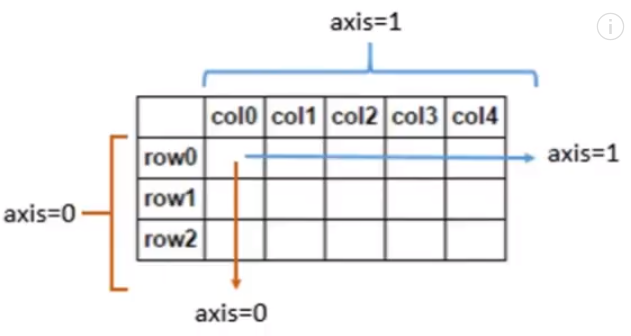

In [12]:
df = df.dropna(axis=0)
df.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [13]:
df.shape

(1046, 4)

In [14]:
df.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Le fait d'avoir surprimer des passagers avec Dropna modifie les statistiques !
La moyenne de survived passe de 38% à 40%
Dans survived, on a que des 1 et des 0. Quand on en fait la moyenne ça donne bien une proportion.

### Nb de passager par classe : value_counts

In [15]:
NbPerClass = df['pclass'].value_counts()          # compte les répétitions. 
print(NbPerClass)

pclass
3    501
1    284
2    261
Name: count, dtype: int64


In [16]:
# NbPerClass est une série
print(NbPerClass[3])

501


<Axes: xlabel='pclass'>

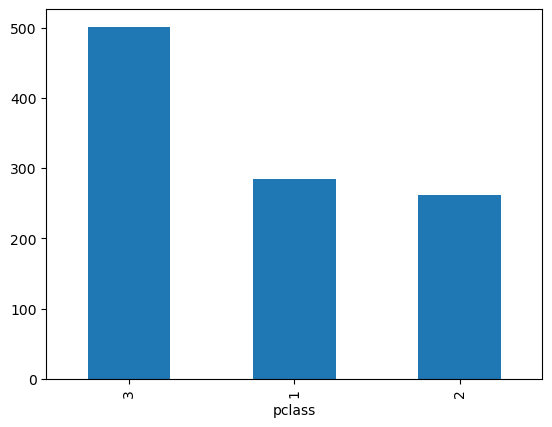

In [17]:
df['pclass'].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

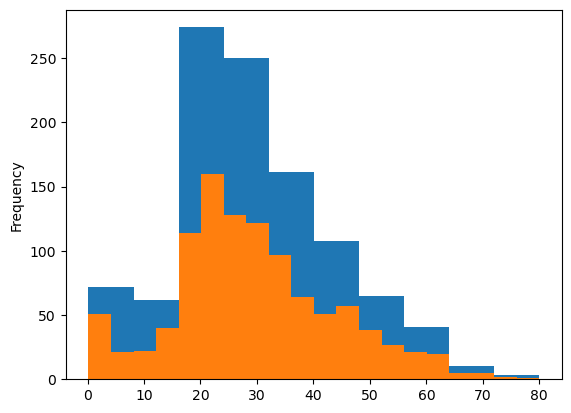

In [18]:
df["age"].hist()
df["age"].plot.hist(bins=20) # le nb de paquets à utiliser

### GroupBy
Lire : https://builtin.com/data-science/pandas-groupby

Afficher les moyennes, regroupées par sexe

In [19]:

df.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


Groupby retourne un dataframe

In [20]:

df_bysex = df.groupby(['sex']).mean()

print(f"{df_bysex['survived']['female']*100:.2f} % des femmes ont survécu")
print(f"{df_bysex['survived']['male']*100:.2f} % des hommes ont survécu")

75.26 % des femmes ont survécu
20.52 % des hommes ont survécu


In [21]:
df_group = df.groupby(['sex'])
df_columns = df_group[["survived"]] #, "pclass"]]
df_columns.mean()


,survived
sex,
female,0.752577
male,0.205167


Regrouper par sexe et par classe

In [22]:
df_ClassSex = df.groupby(by=['sex', 'pclass']).mean()
df_ClassSex


survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [25]:
df_ClassSex = df.groupby(by=['pclass', 'sex']).mean()
print(type(df_ClassSex))
df_ClassSex


<class 'pandas.core.frame.DataFrame'>


survived        age
pclass sex                        
1      female  0.962406  37.037594
       male    0.350993  41.029250
2      female  0.893204  27.499191
       male    0.145570  30.815401
3      female  0.473684  22.185307
       male    0.169054  25.962273

# TO DO : comment accèder aux valeurs individuelles dans Dataframe précédent ?
Quand on a un groupby multiple

In [24]:
df_groups = df.groupby(['pclass', 'sex'])
df_columns = df_groups[["survived"]]
df_columns.mean()

df_survived = df_columns.get_group("sex")
# df_group = df_groups.get_group("sex")
# df_columns = df_groups[["survived"]] 
# df_columns.mean()

#print(f"{df_columns['survived']['female']['pclass']:.2f} % des femmes en 1ere ont survécu")


ValueError: must supply a tuple to get_group with multiple grouping keys